greatlearning-brand (1).svg

Proprietary content. Â© Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> A. Table Of Contents </font>

### <font color='blue'> Use Case : Processing And Storing IoT Data Into AWS DyanmoDB </font>

The Mentor Notebook for Week 02 of this course (Course 05: Cloud Computing), titled ```C05W02-01-SNS-Kinesis-Setup-Main.ipynb``` provided a step-by-step guide to setup and configure access tot he following AWS services:

* **Kinesis Streams**
* **Simple Notification Service (SNS)**

The current Mentor Notebook is an extension of the functionality provided in Week 02, and the use cases access these managed services. Kindly refer to the instructions shared in ```C05W02-01-SNS-Kinesis-Setup-Main.ipynb``` to avail this functionality, and see it in action.

# <font color='blue'> B. Use Case : Re-labeling And Storing IoT Data Into AWS DynamoDB </font>

The goal of this use case is:

* Device sensor data from a variety of devices (simulated) arrives at **AWS IoT Core**
* **IoT Core** is configured to send all arriving data to an **AWS Lambda Function**
* The **Lambda Function** standardizes attribute names in the input JSON data, and saves the result in an **AWS DynamoDB Table**
* We examine the objects in the **DynamoDB Table**

We will focus on the following:

* Writing a **Lambda Function** to process (IoT device) JSON records, from scratch
* Creating a **DynamoDB Table**
* Configure this **Lambda Function** to store processed data into the **DynamoDB Table**
* Configuring AWS to deliver data from the **IoT Core** to this **Lambda Function**
* Examining the **DynamoDB Table** for the saved data

## <font color='blue'> Creating A DynamoDB Table </font>

First, we create a DynamoDB table to store the standardized JSON data coming in from IoT Core, after a Lambda function has processed it.

Choose an appropriate table name, and select the Primary Key. As we are aware, the primary Key has 2 components:
    
* **Partition Key**: We want to standardize the "deviceid" field of the JSON data from IoT core, to "device_id". Specify this as the the partition Key.
* **Sort Key**: Use the "timestamp" field

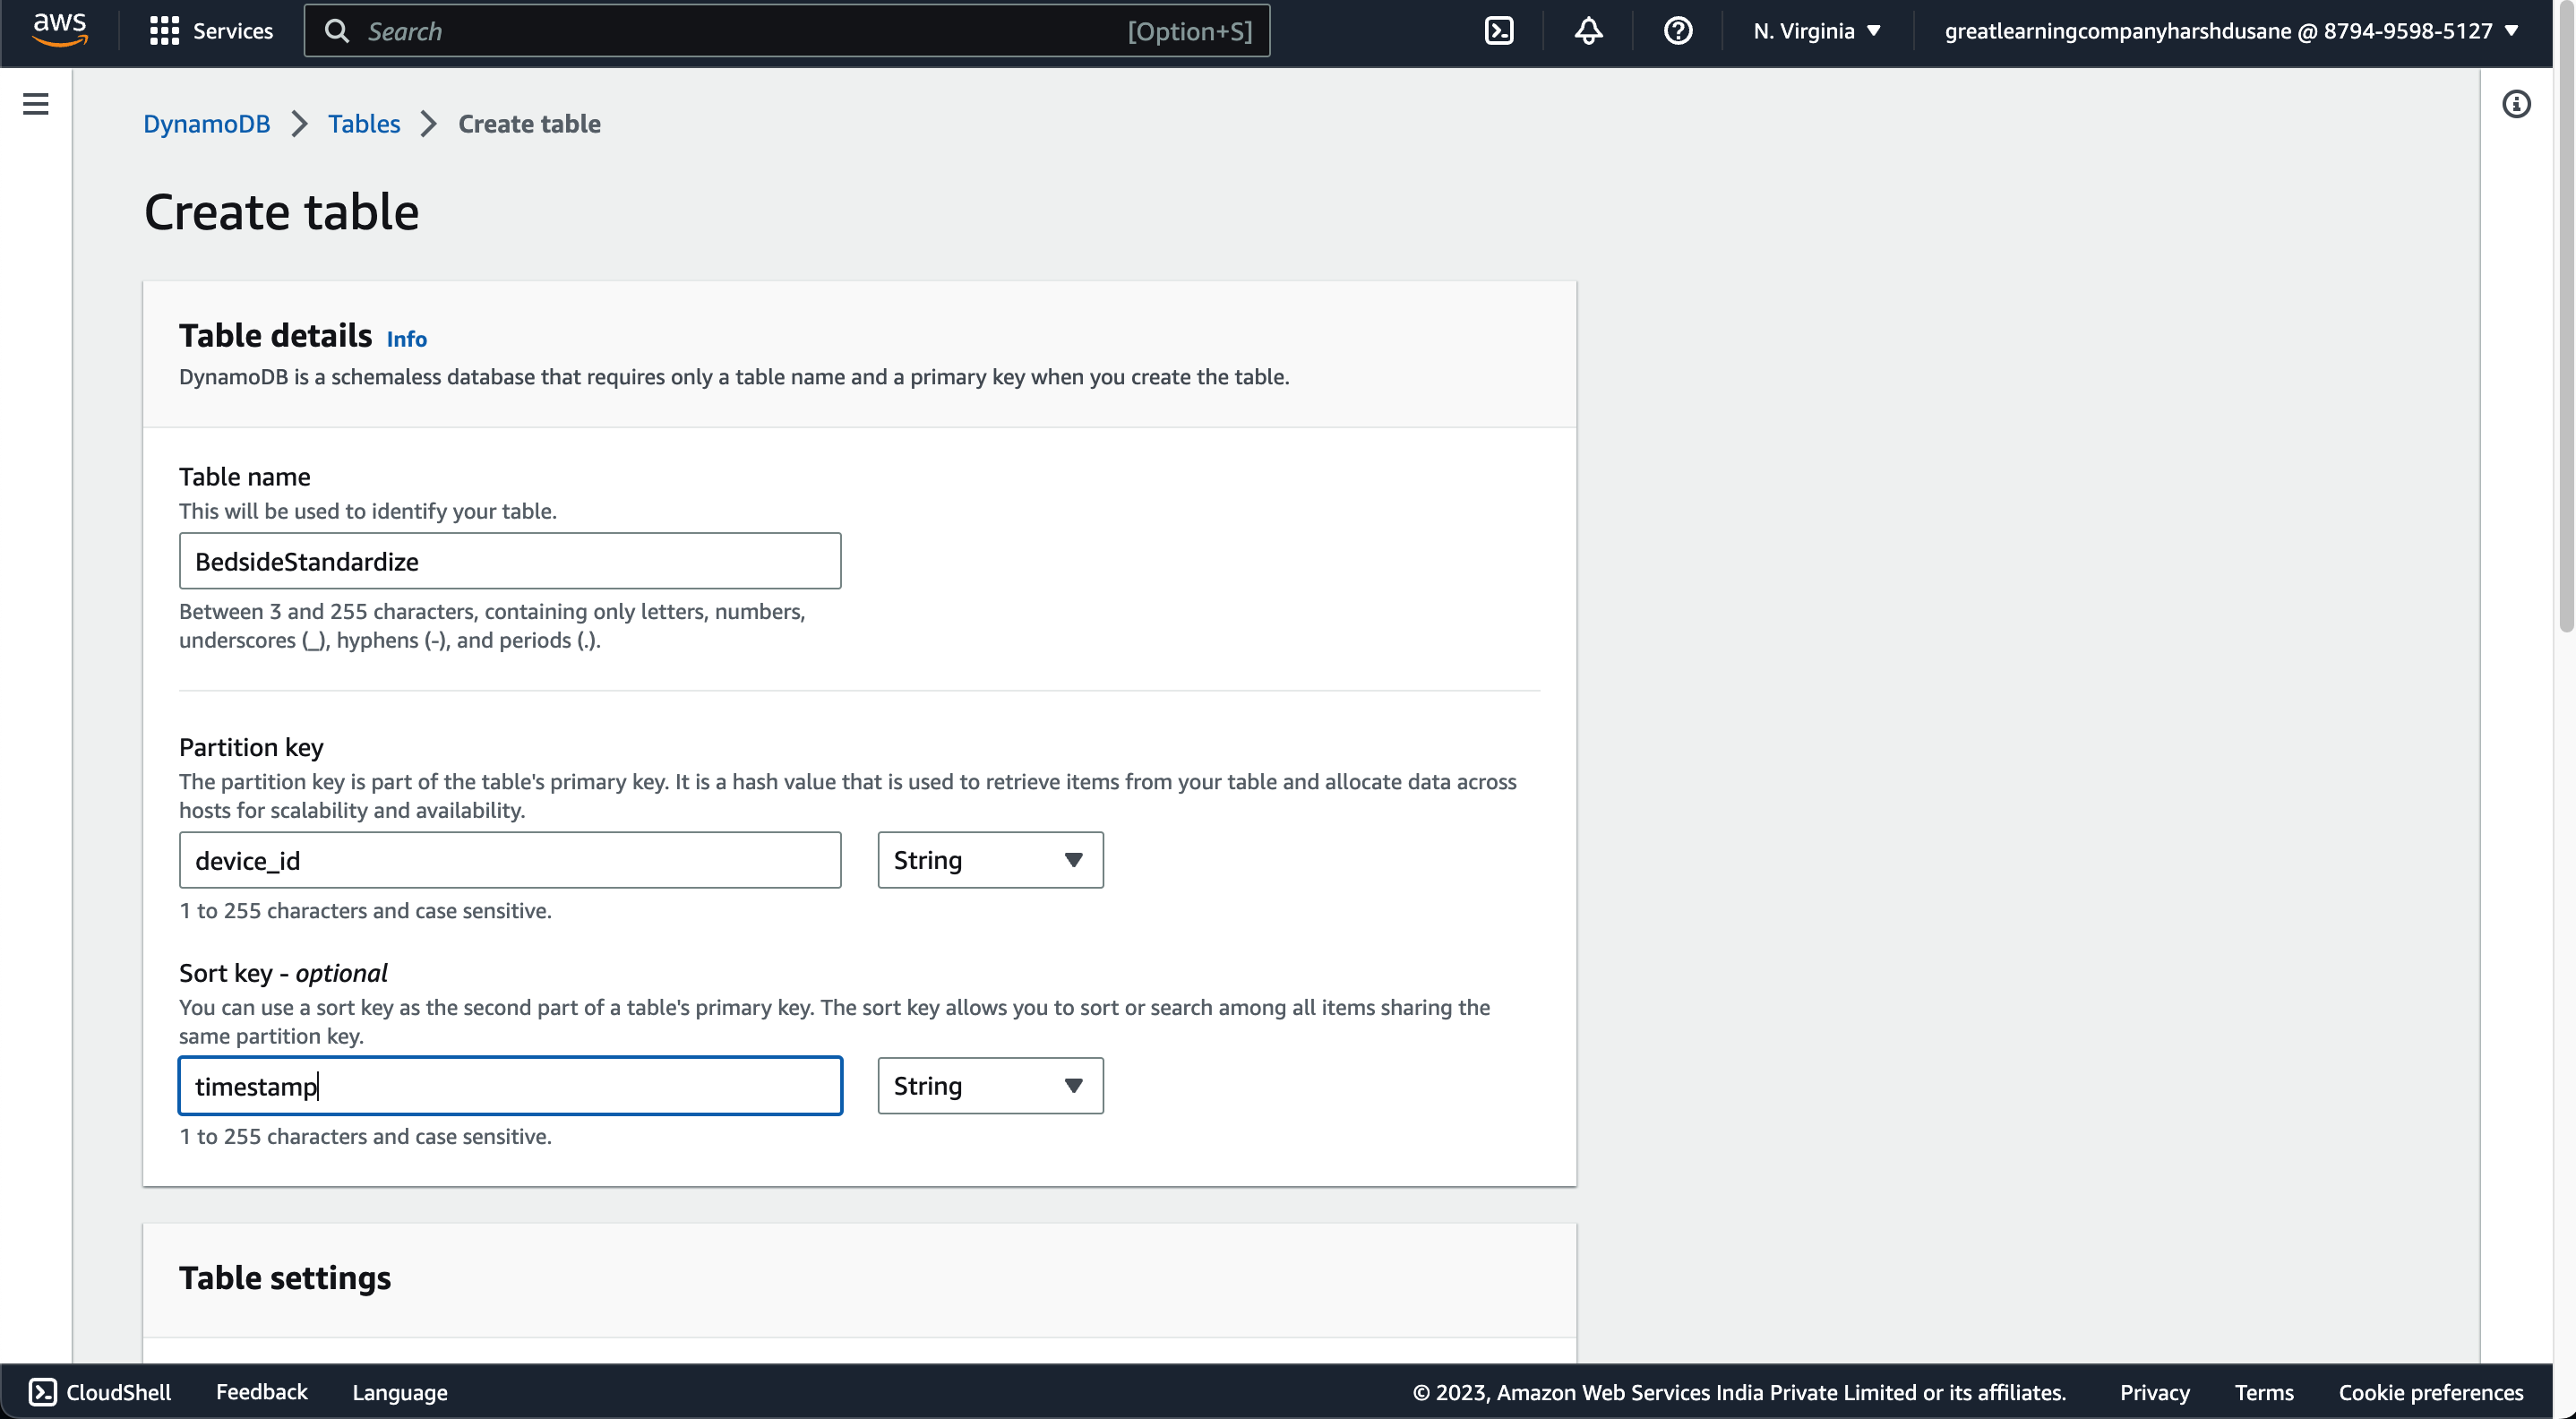

## <font color='blue'> Creating The Lambda Function </font>

Let us now create a stand-alone Lambda function to standardize the data. Give it an approriate name, and choose the Runtime Language support as Python:


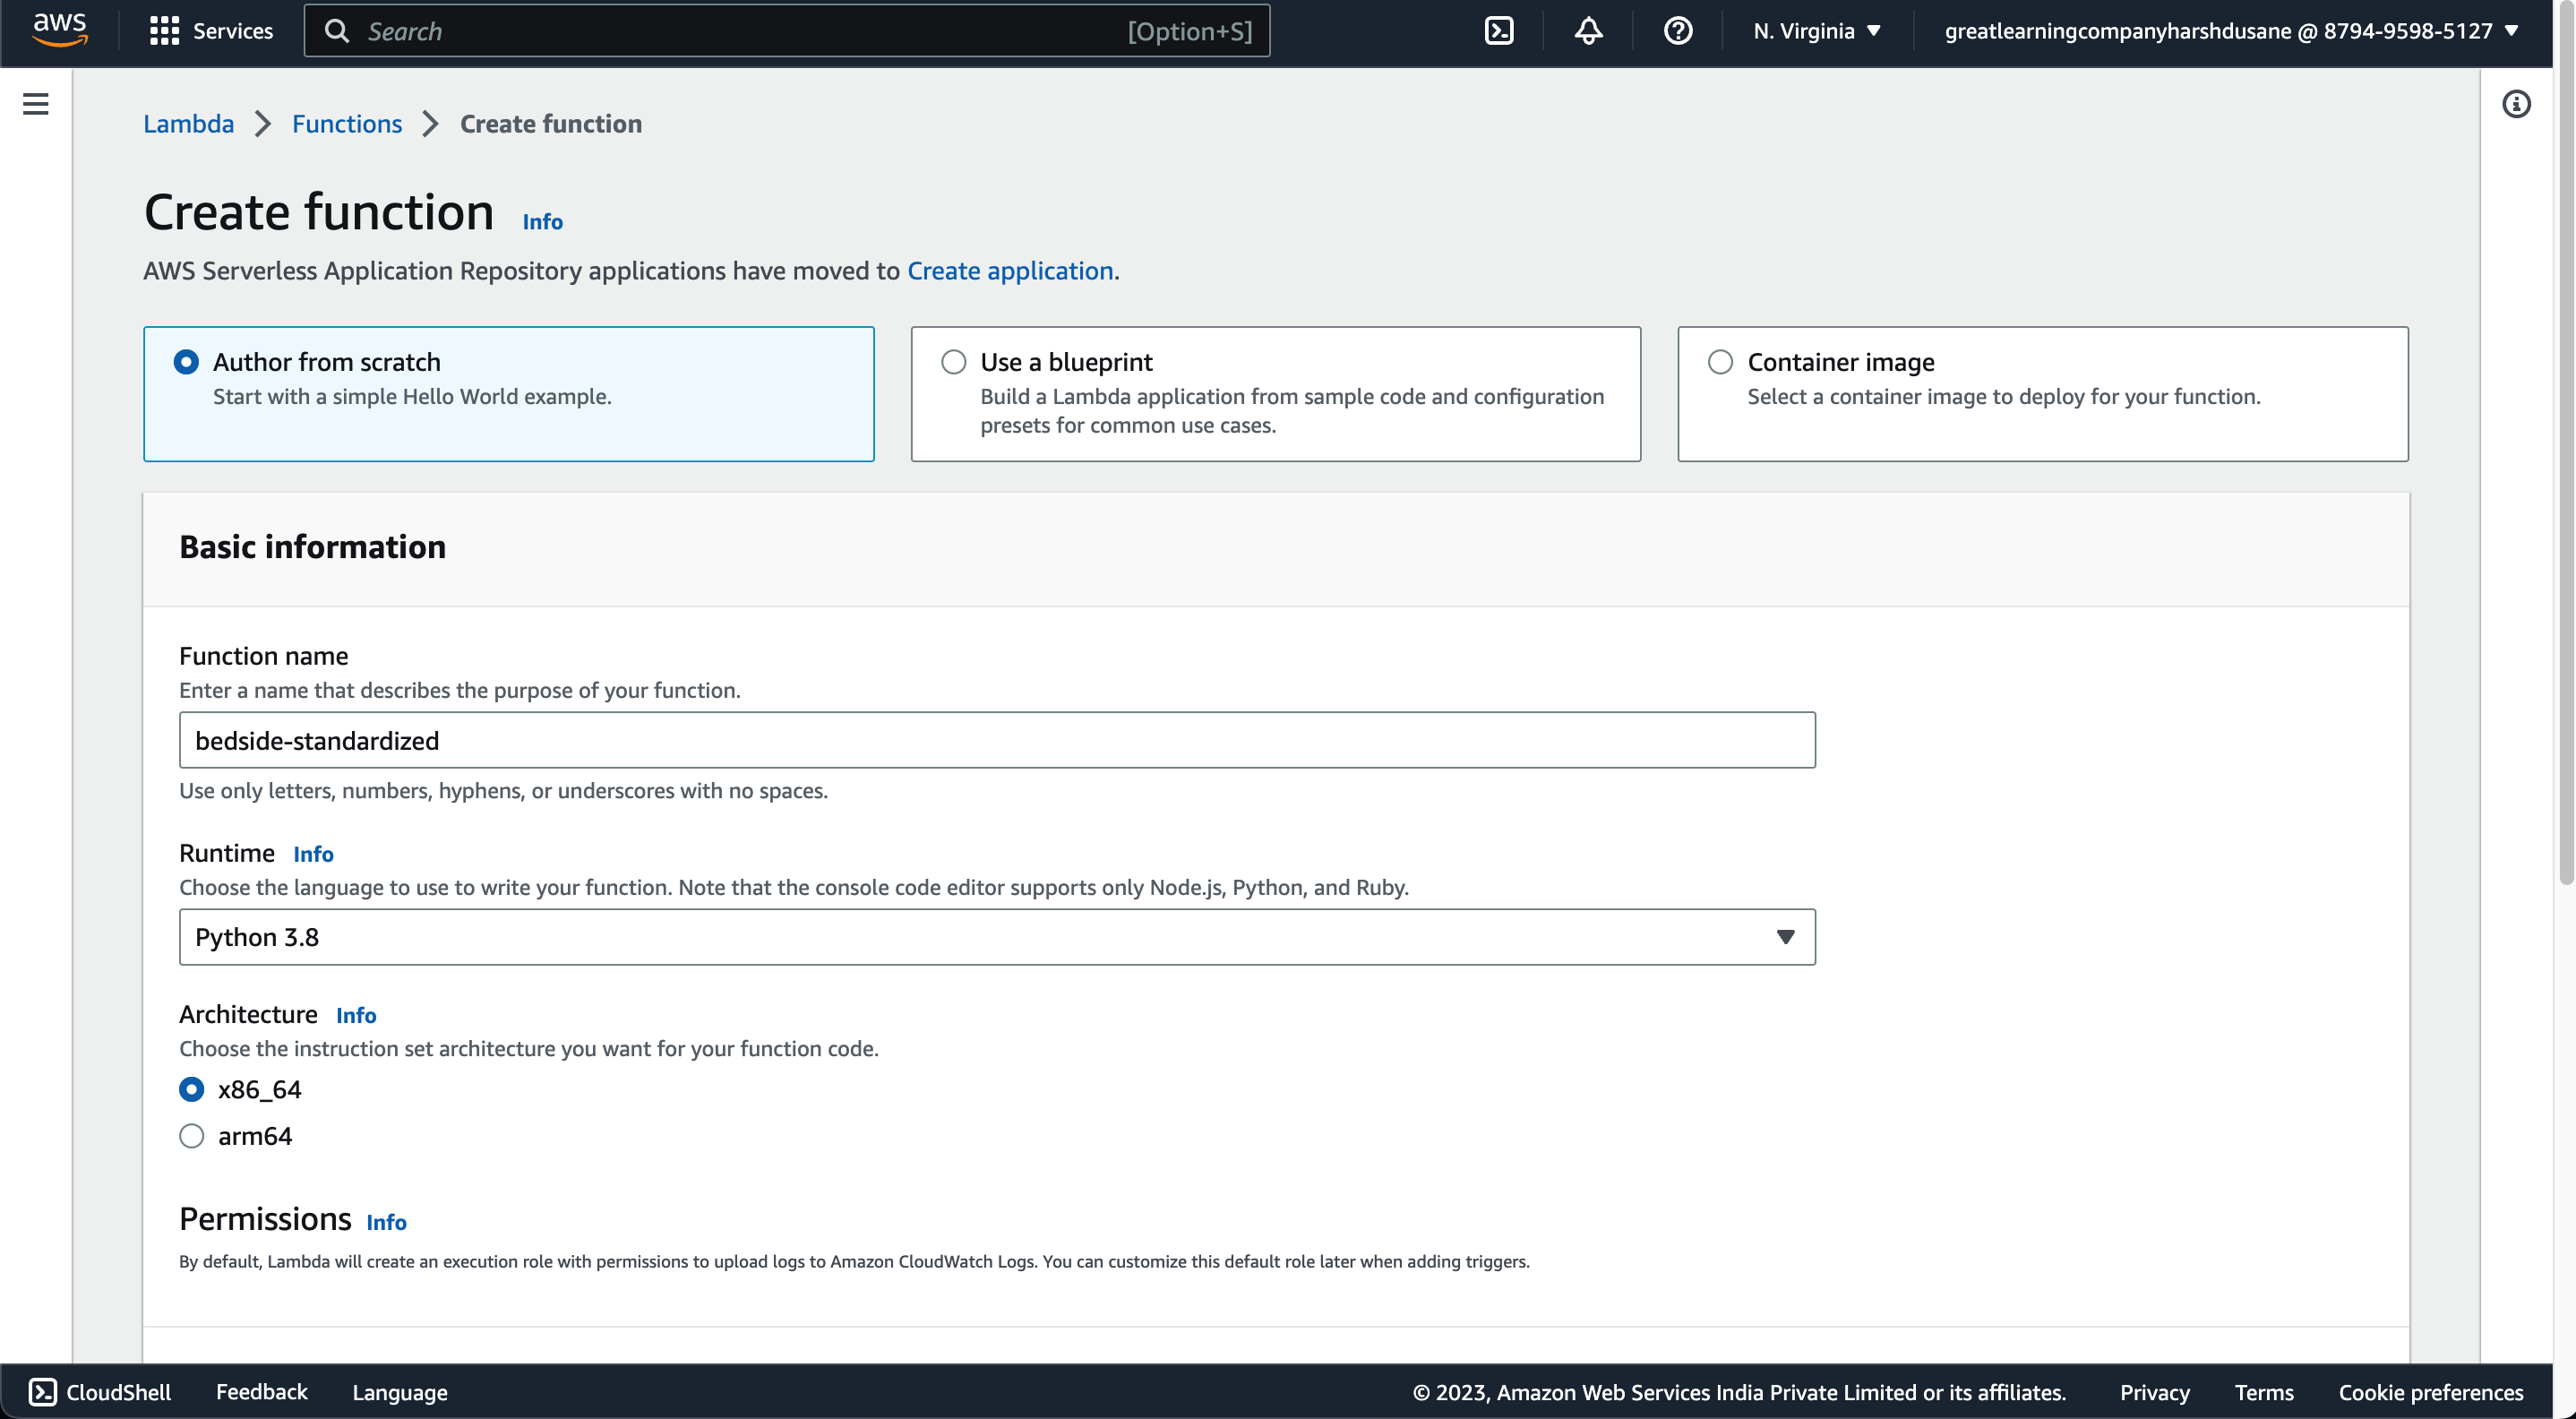

Next, we are going to create and use an existing role option to create the lambda function.

To complete this we will be first creating the IAm role with permissions that we know we are going to use in this lab.

Majorly we will be using following services, so we will be including all the srvcies associated with it in the lambda role.

The same role can be used for the other tar task mentioned in the next section for anomaly detection.

Lets have a look at the services that we need to include. You can follow the below steps.

Go to the IAM and click on create role.

1. Choose ```Lambda``` as the option shown below and click on next.

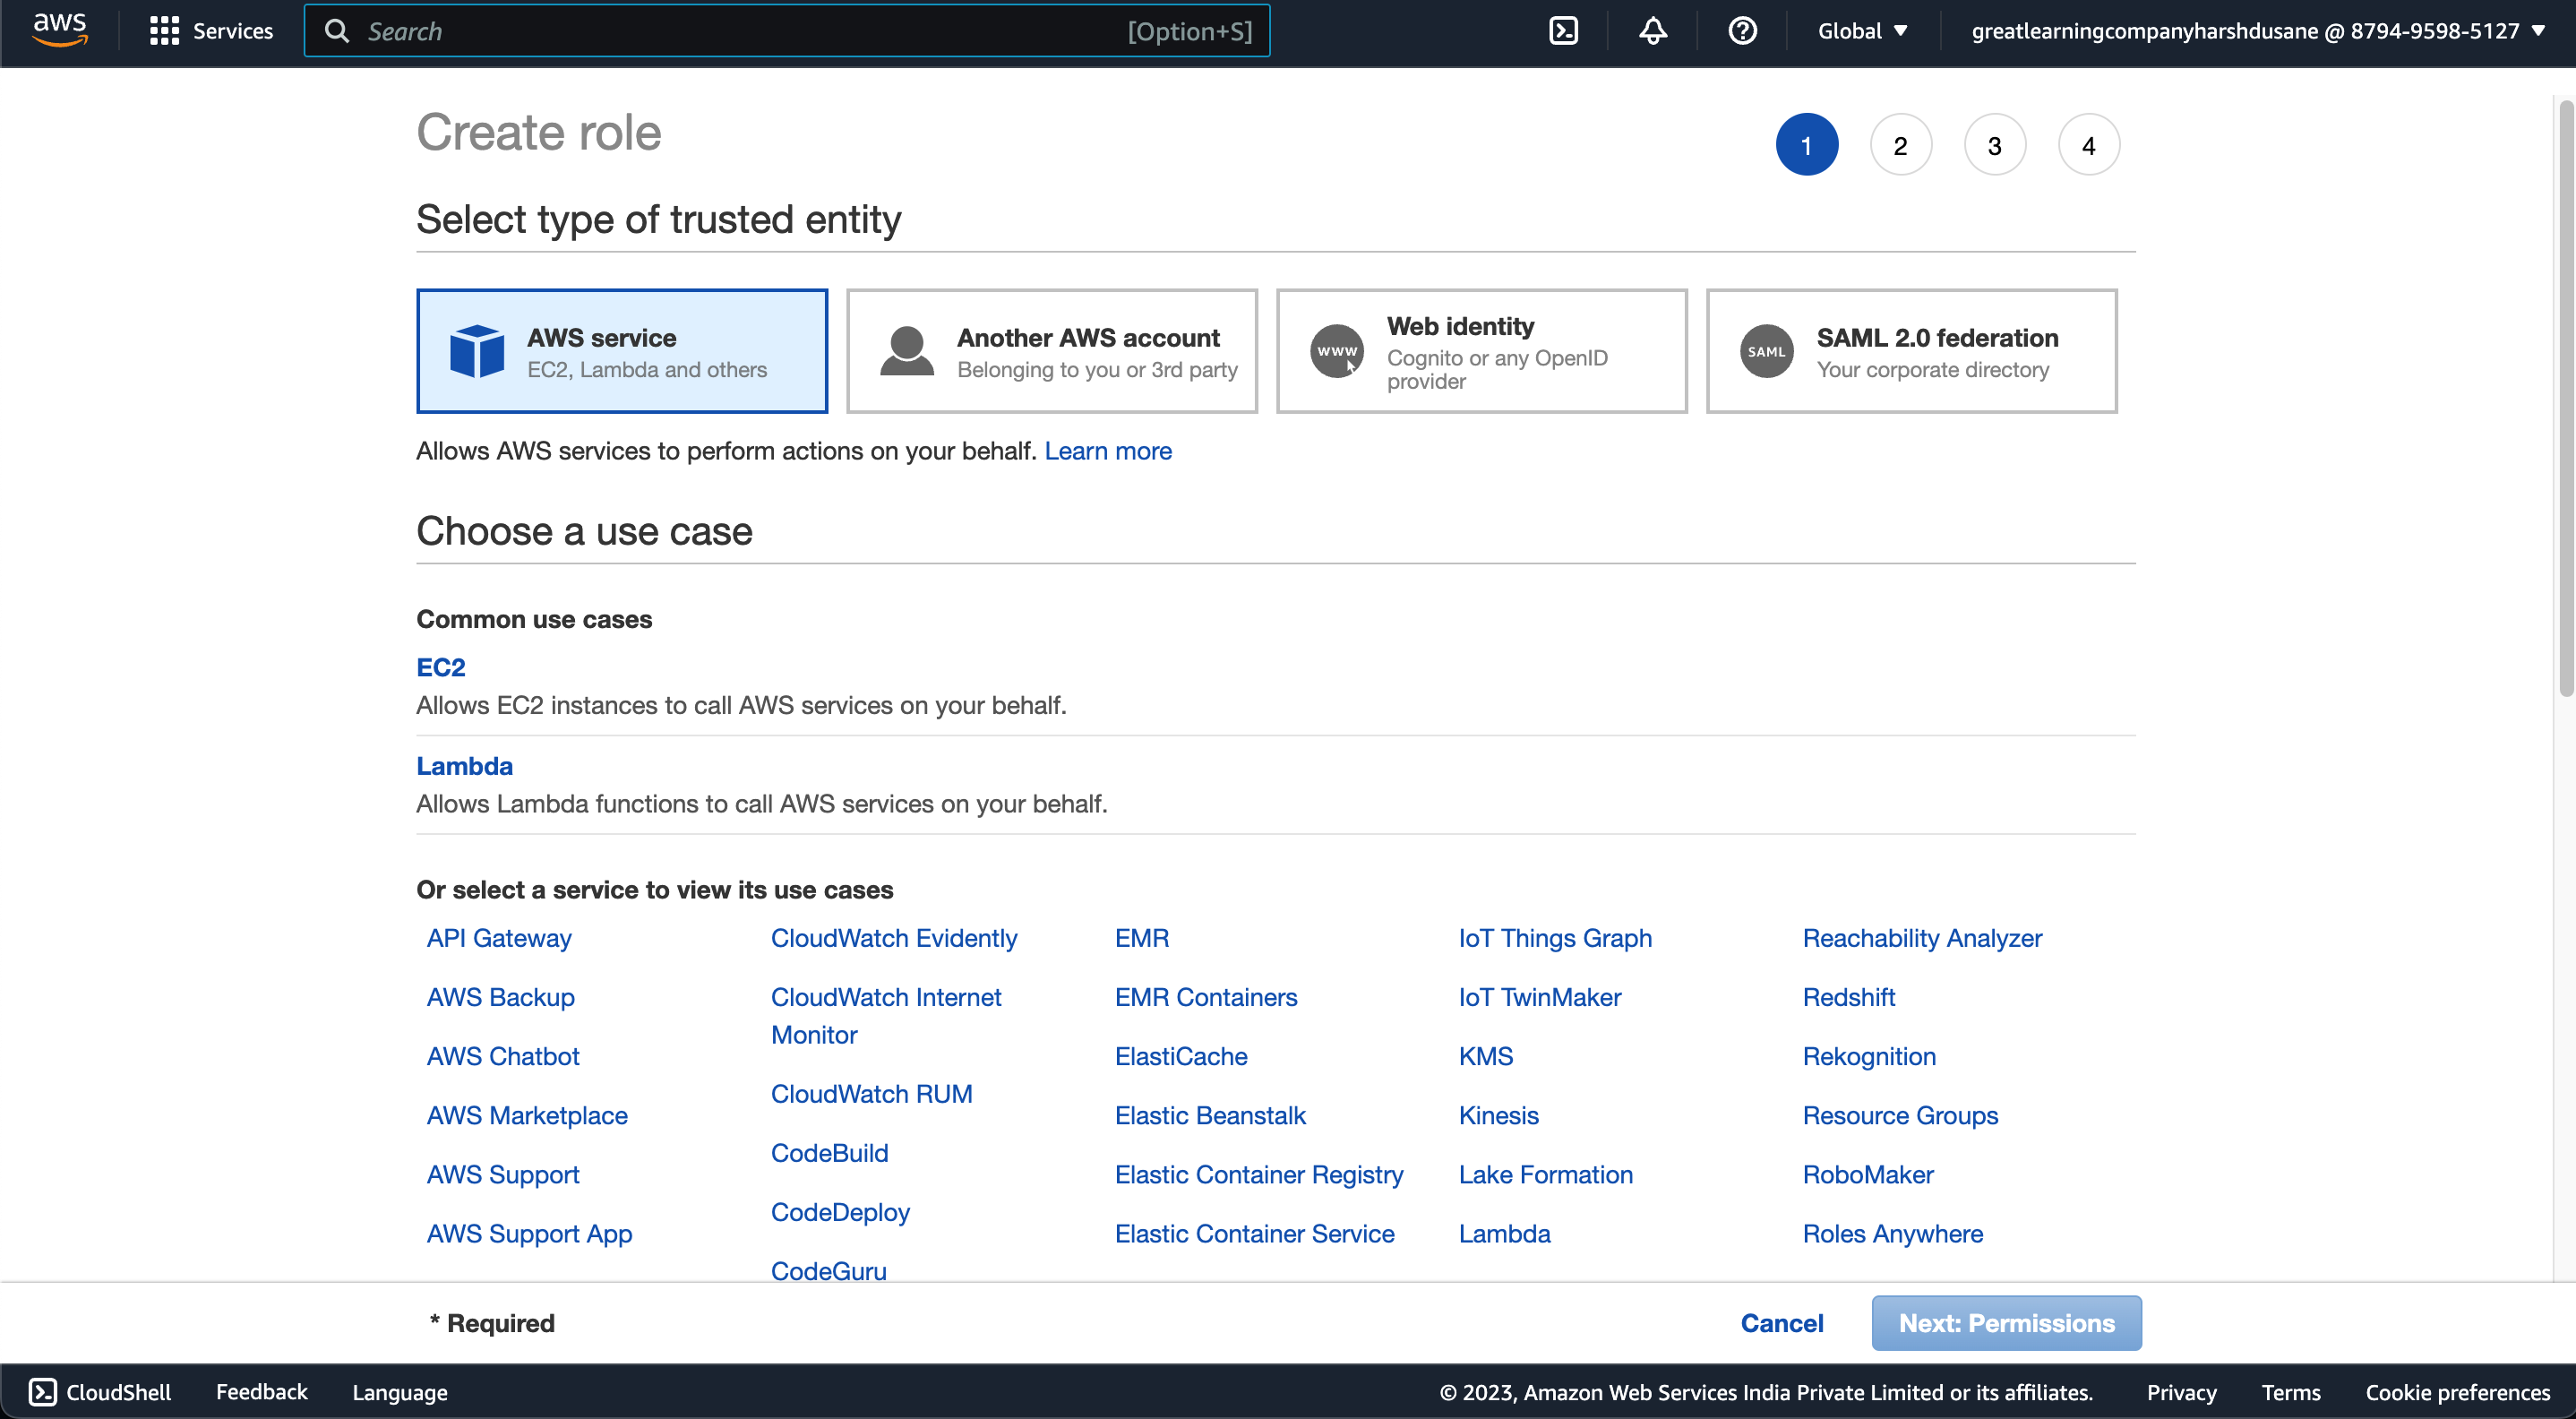

2. On this page add all the permissions/services shown similar to below.

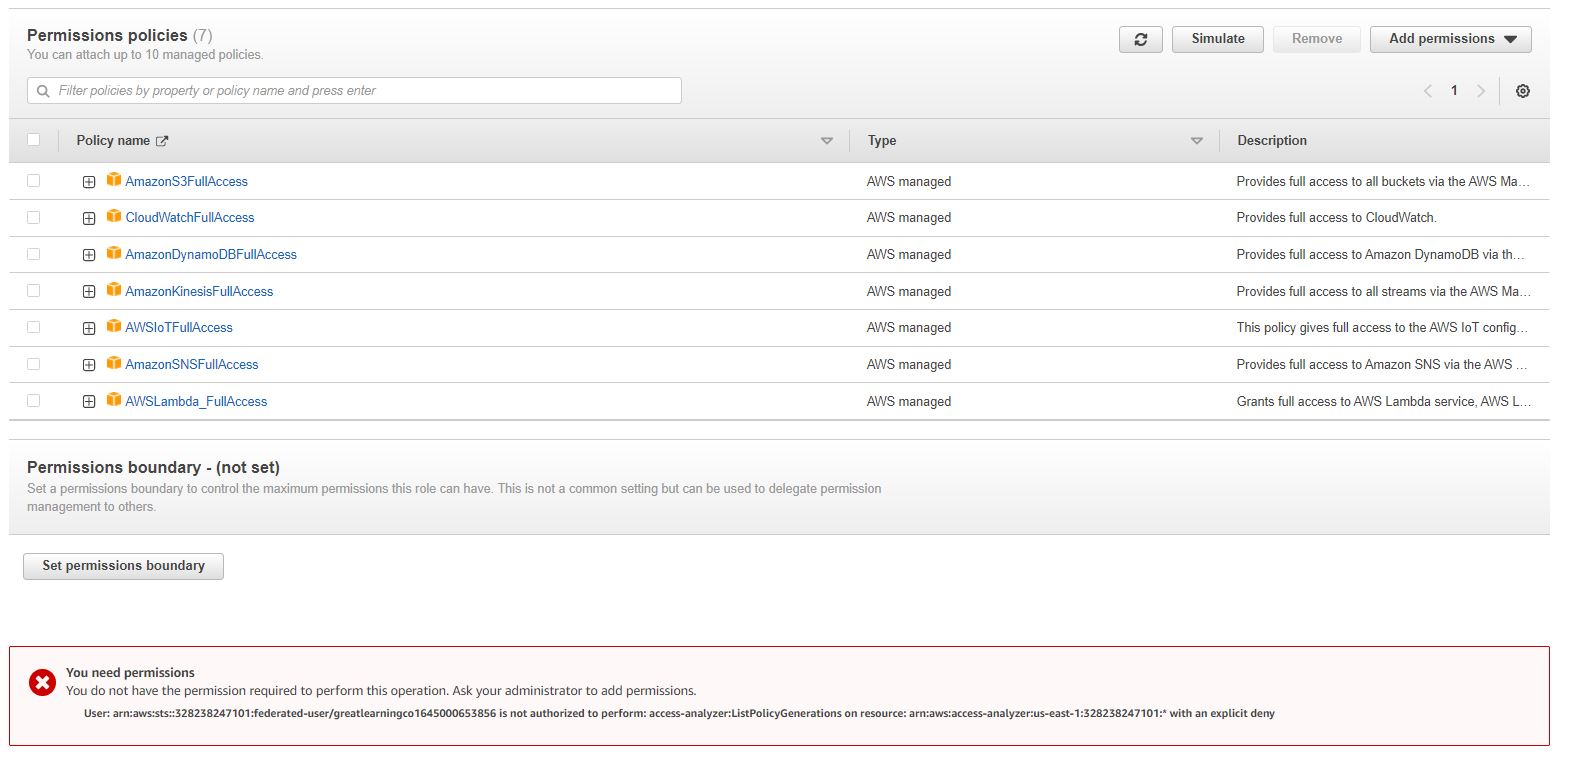



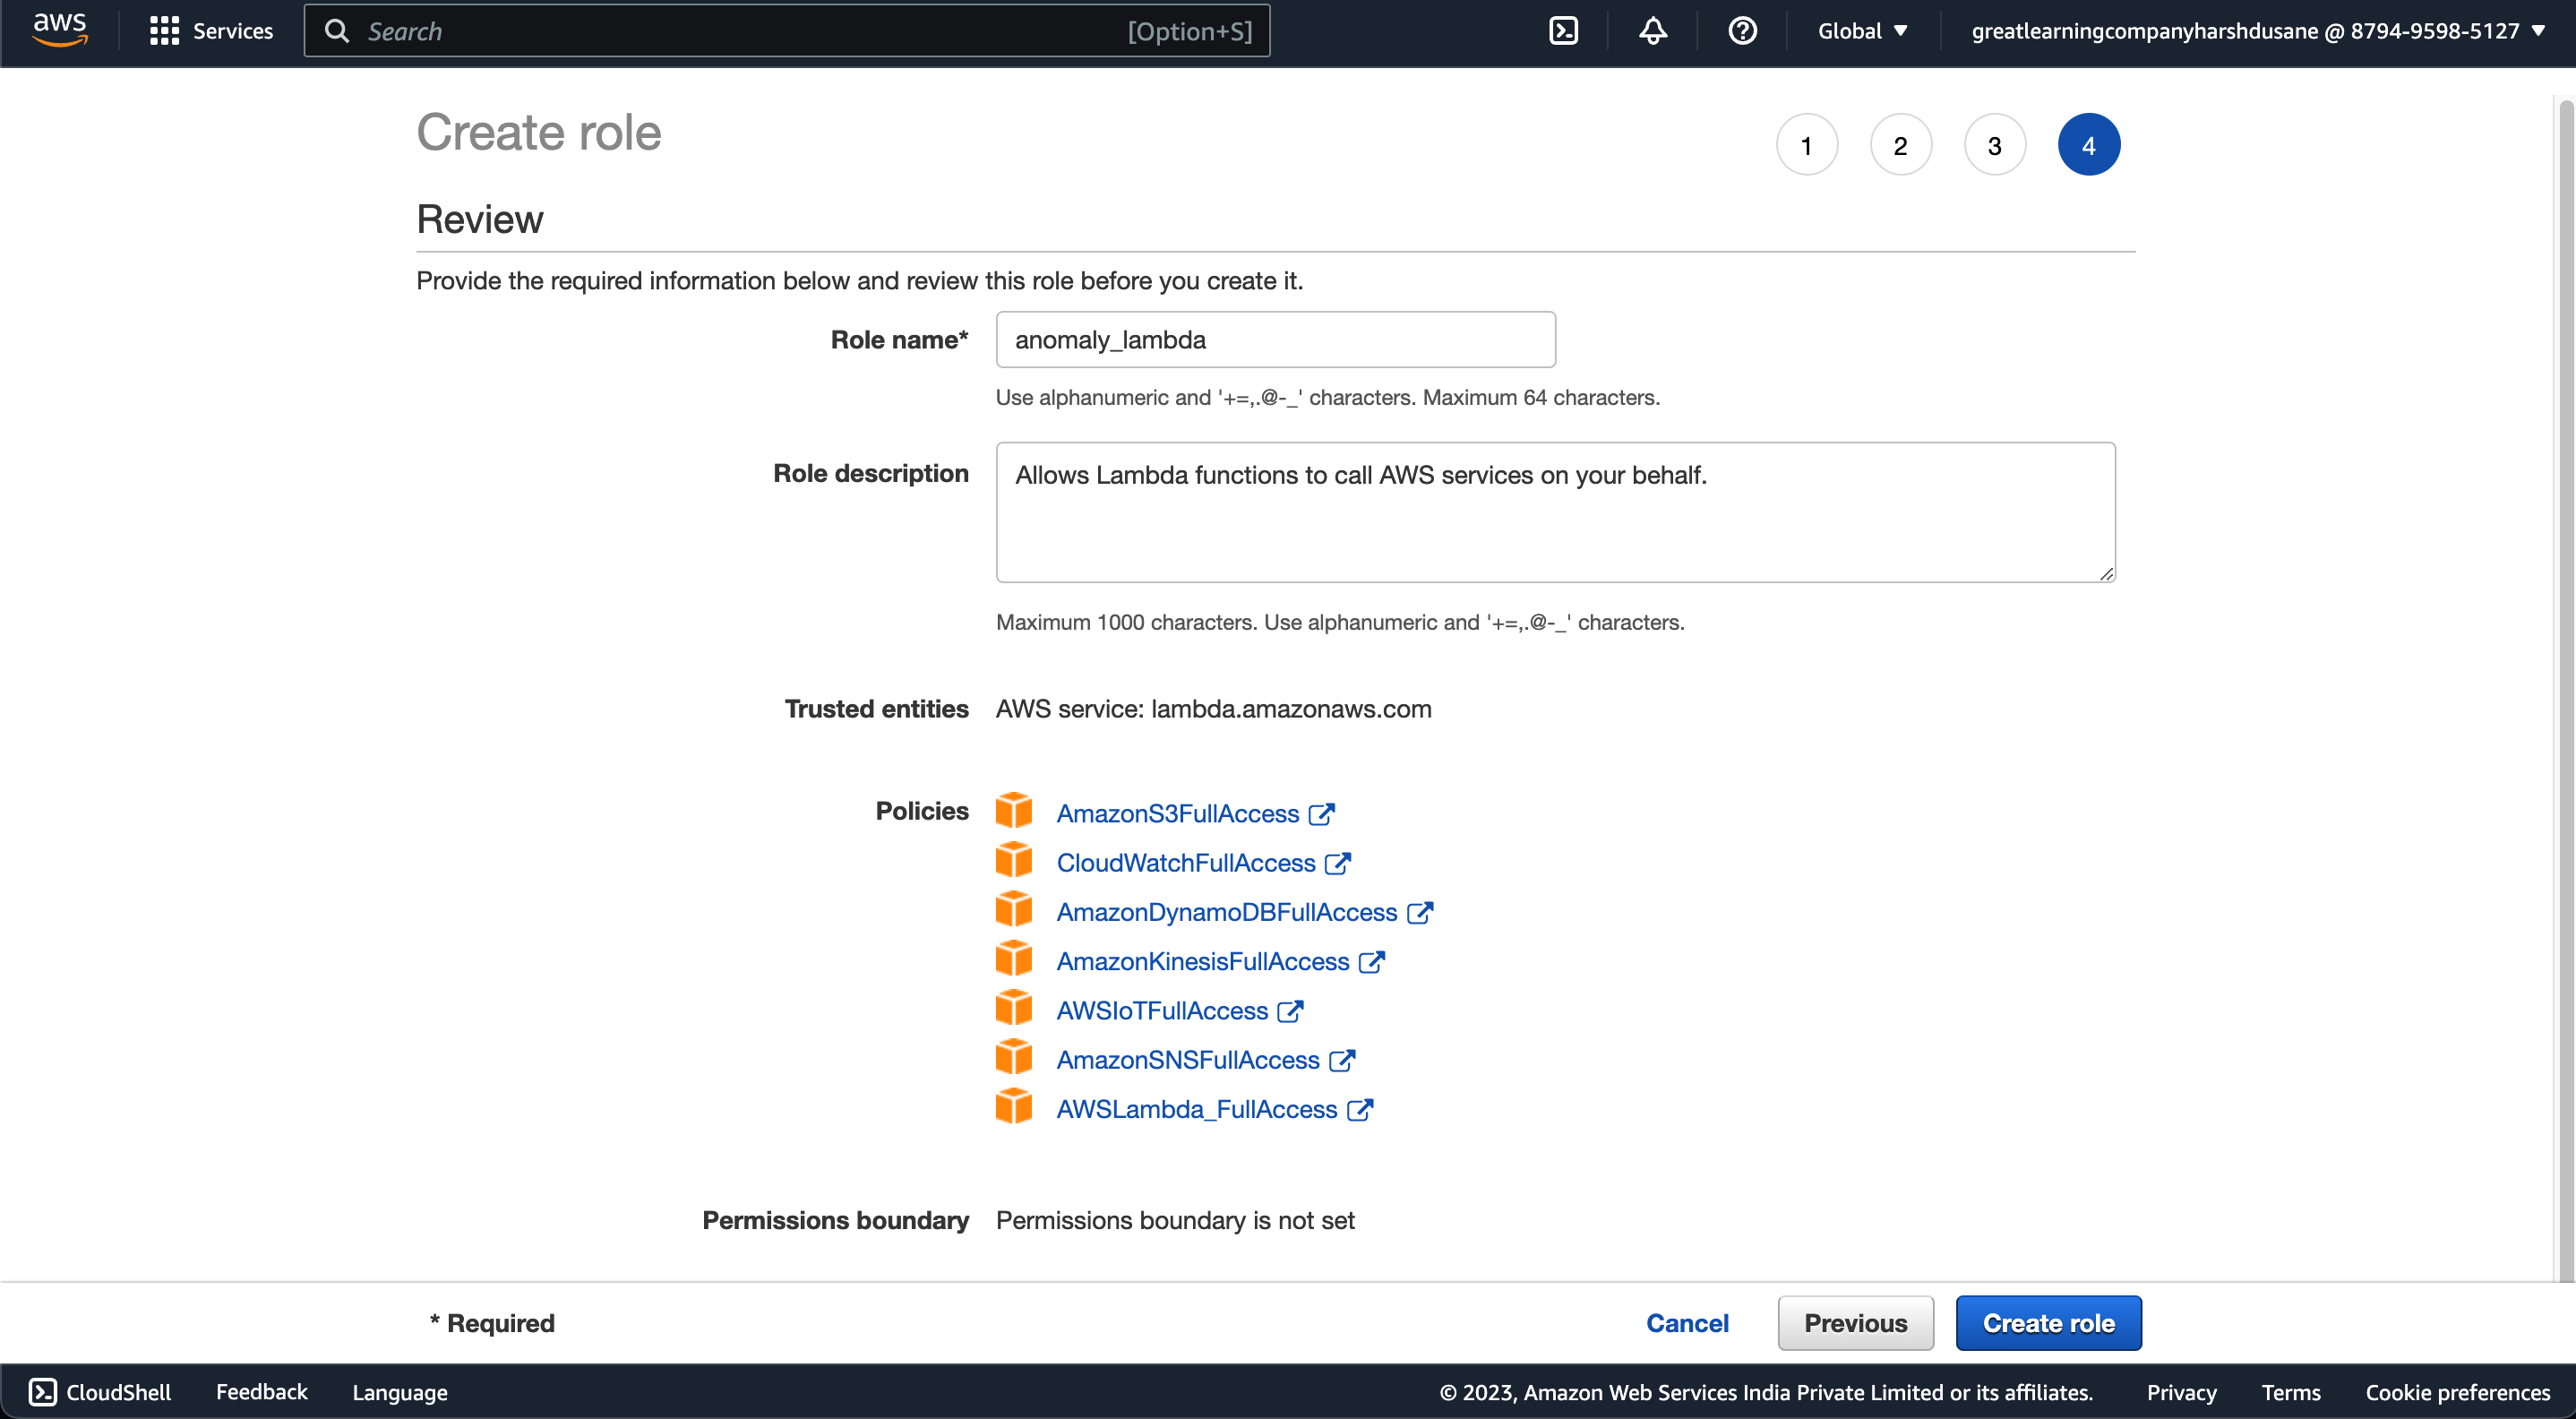

3. Once the services are added give this role a name and click on create.
4. Go to the page for Lambda creation and under the ```Change default execution role```, choose the option of ```Use and exisitng role```.

5. The role that you have created should have been available for you to choose. If the role is not visible click on refresh button and it should pappear of created correctly.


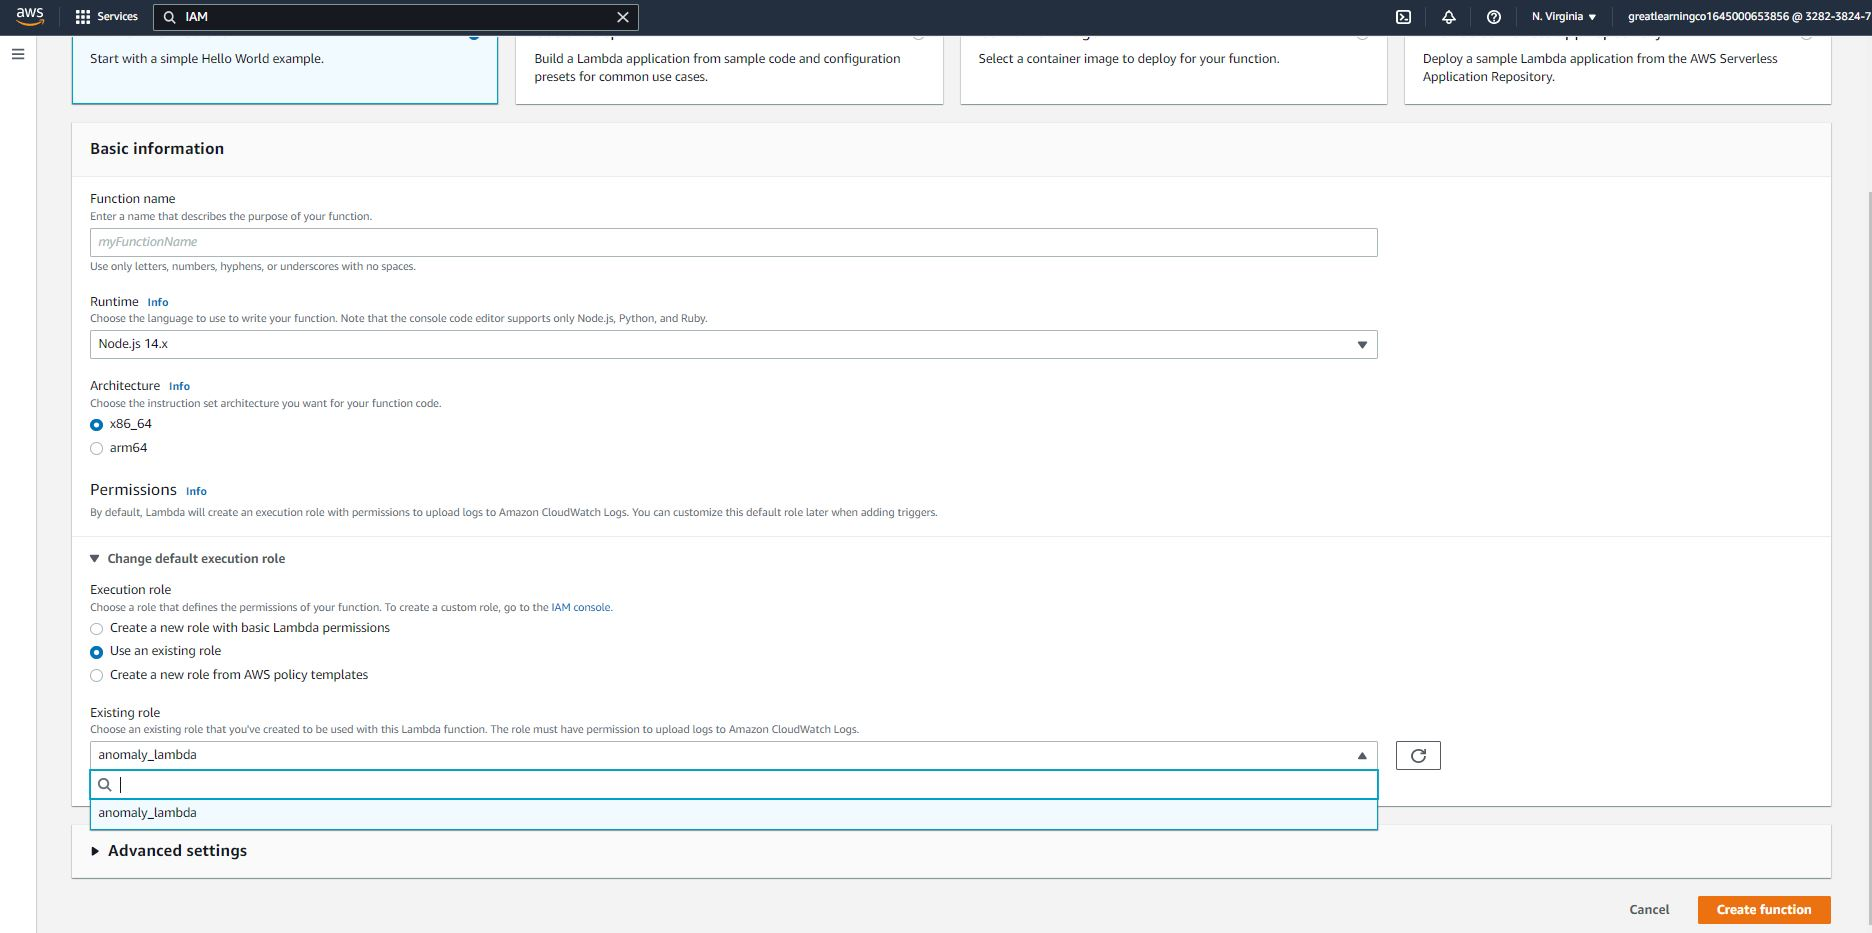

6. Choose it and complete the lambda function creation part.

We need to write the Python code for body of our Lambda function. This source code has been shared separately with you as a Python source file - ```standardize_lambda_function.py```. Paste it into the Lambda editor as shown:

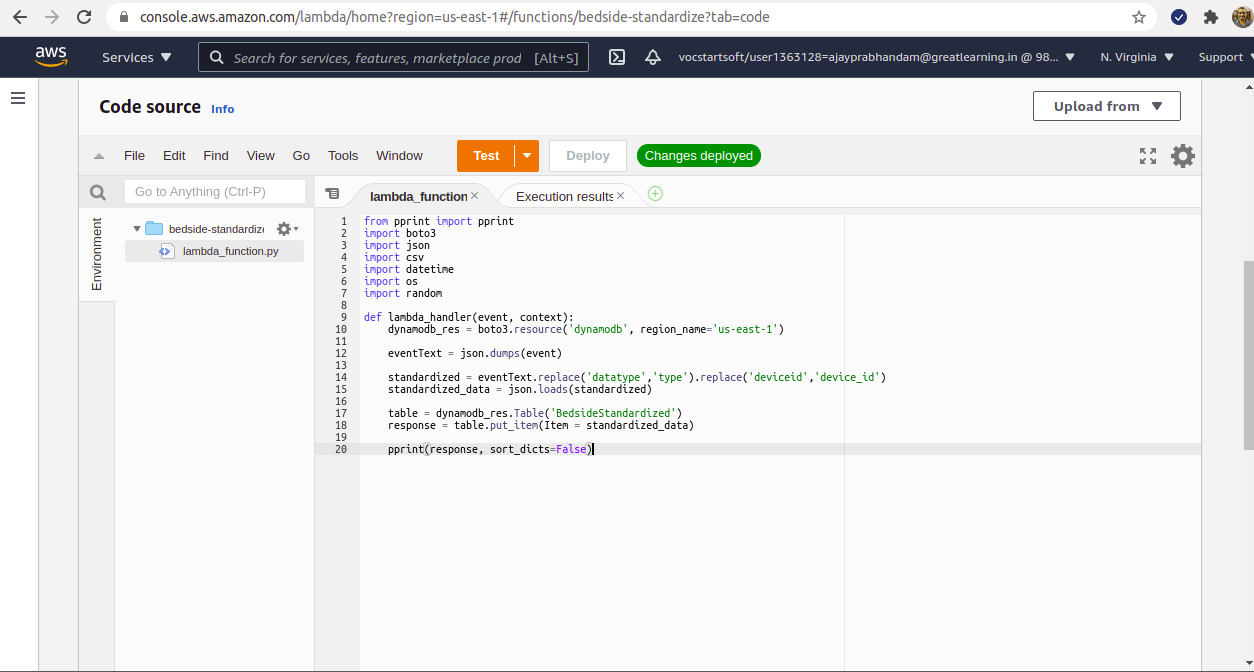

The highlights of the code are:

* Uses the built-in AWS boto3 Python library to access the APIs of AWS managed Services.
* Here we access the DynamoDB API, to place data into a DynamoDB table
* First, we take the JSON data coming in from IoT Core, and modify a couple of attribute names:
    * "deviceid" changed to "device_id"
    * "datatype" changed to "type"
* The modified JSON record is saved as a document into the DynamoDB table

We need to click on the ```Deploy``` button to bring this Lambda function into play.

We can test whether this Lambda function works as intended, by creating a Test event, using sample JSON Data:

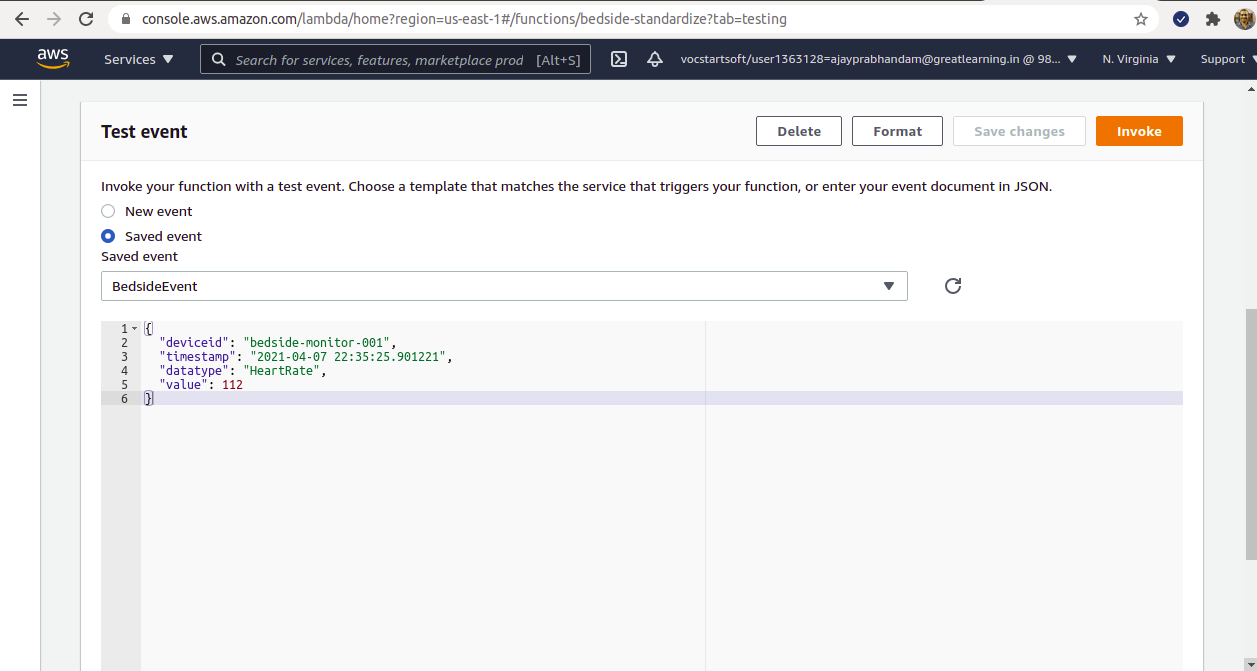

We need to click on the ```Invoke``` button to invoke this test case.

## <font color='blue'> Configuring An IoT Rule To Send Data To The Lambda Function</font>


Let us go to ```IoT Core``` under AWS Services, and under the ```Message Routing``` option on the left-side frame, select ```Rules```. Create a new ```Rule```, giving it an appropriate name and an optional description:

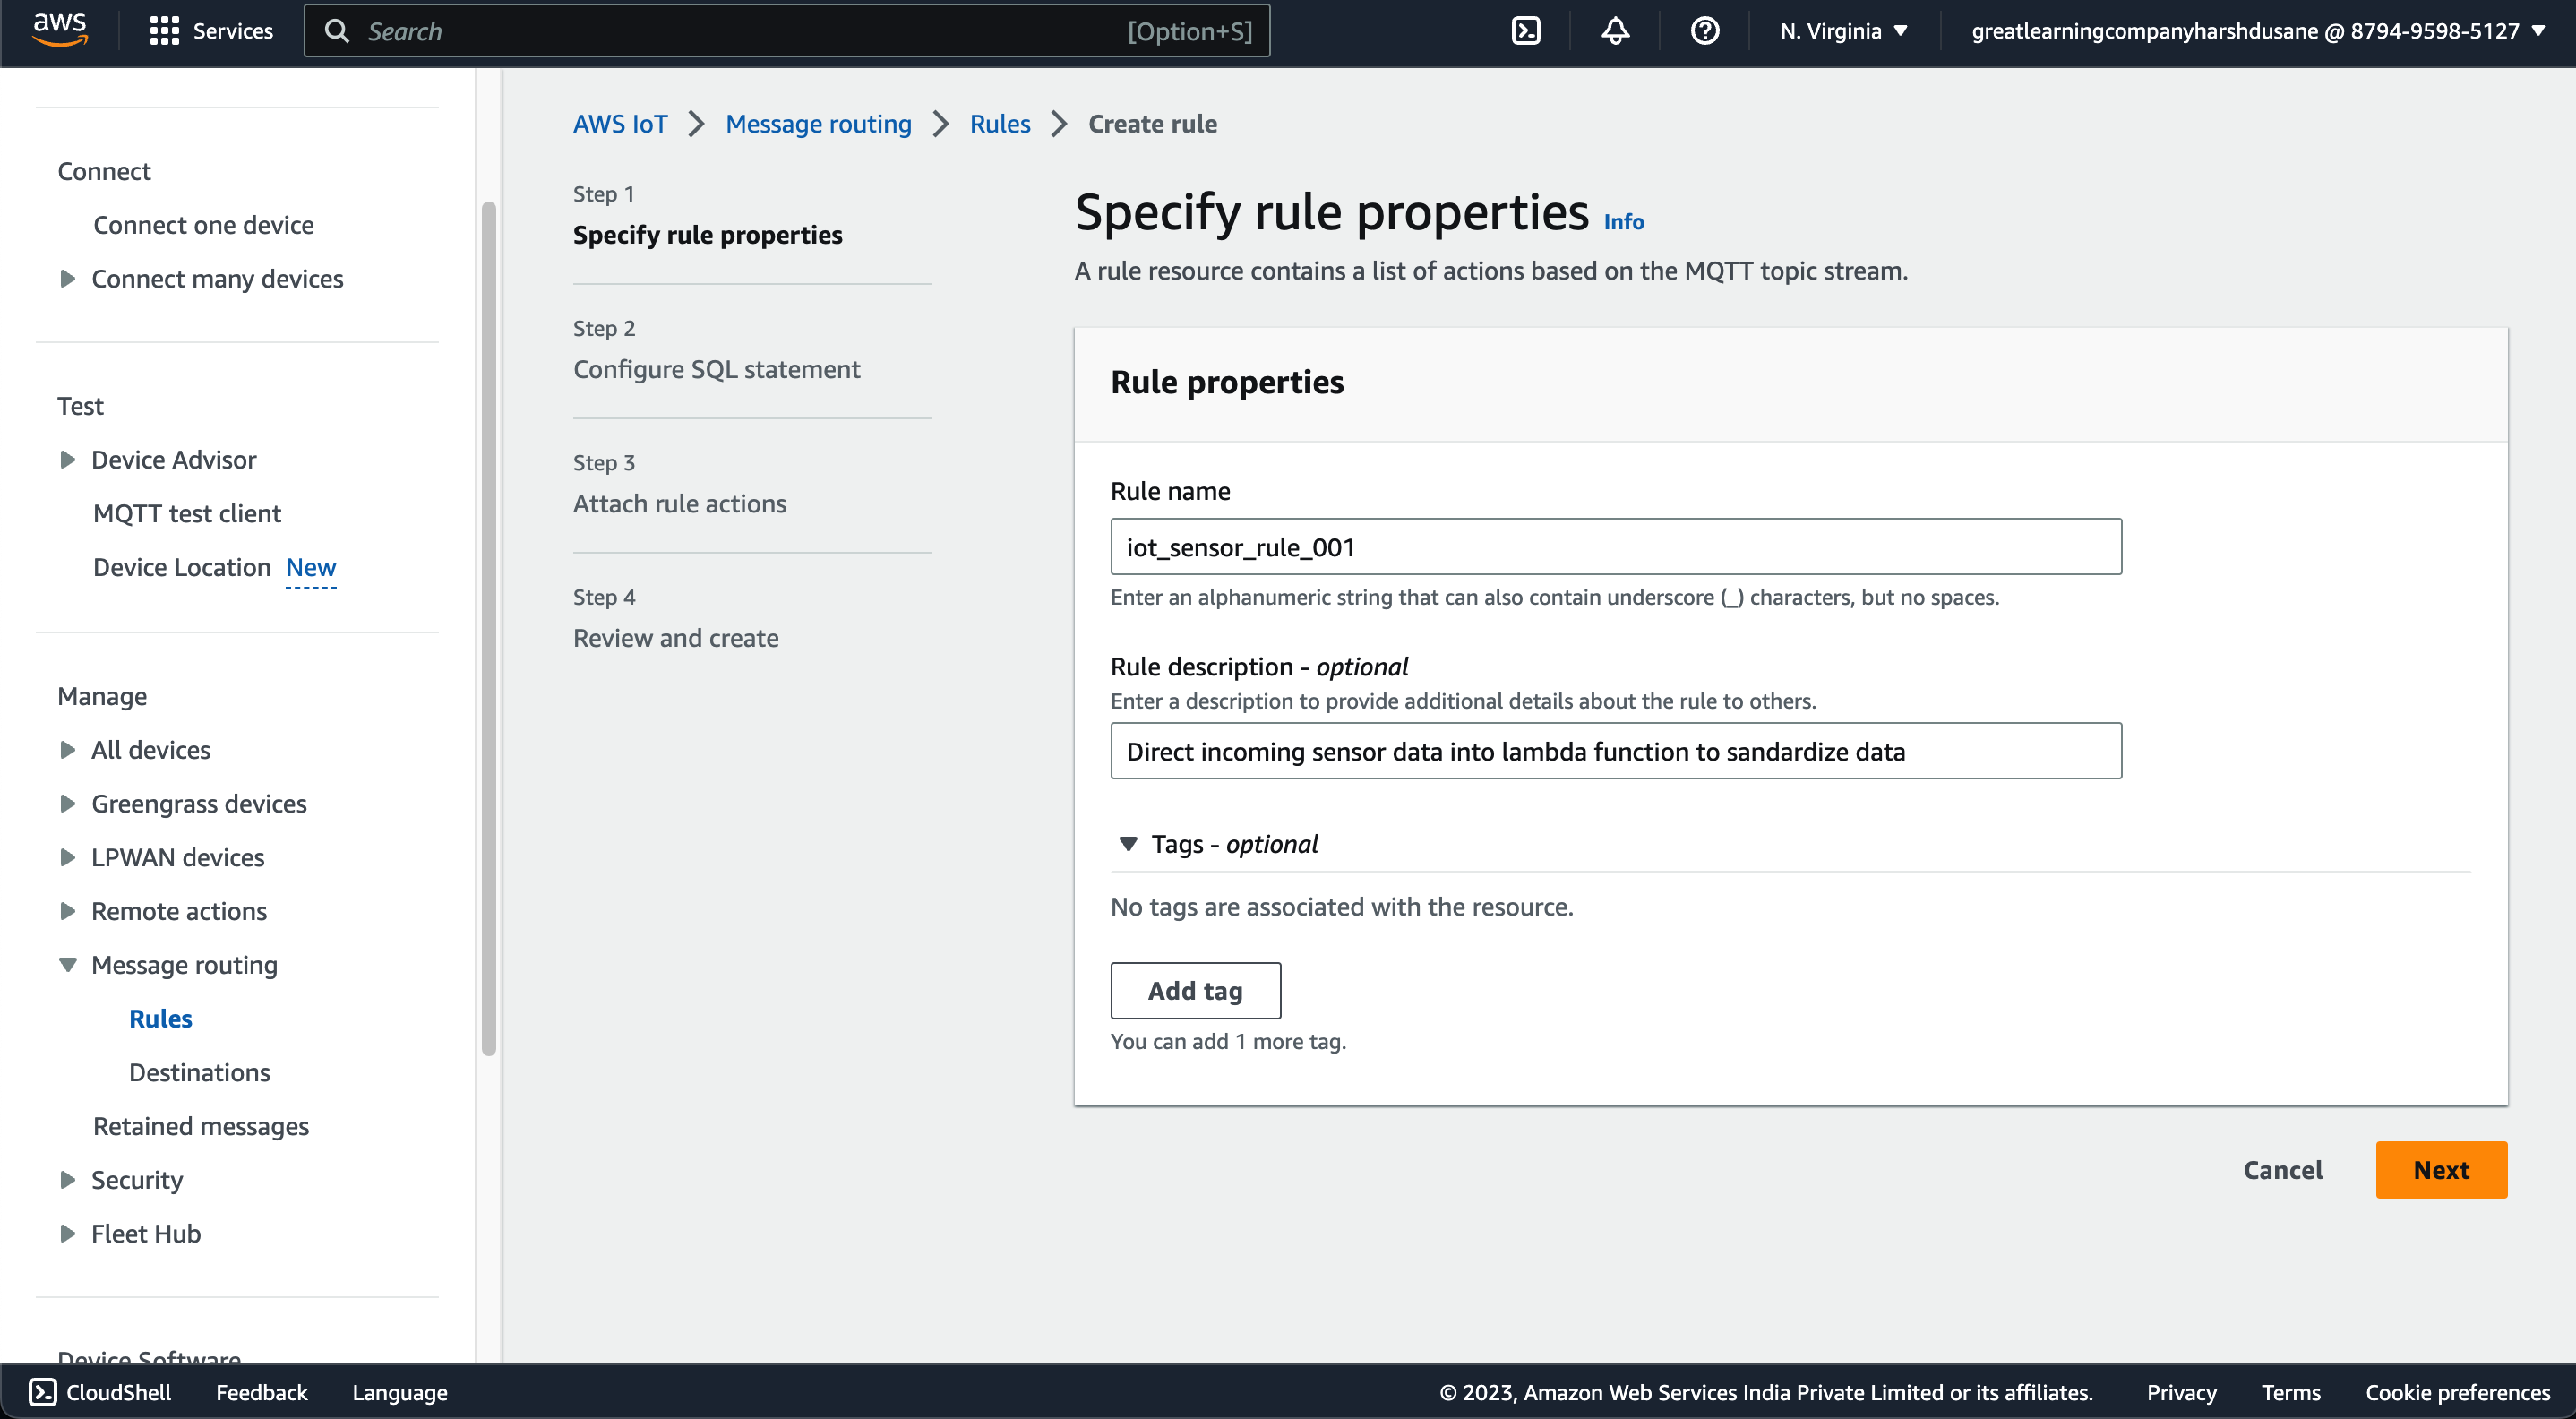

Provide the topic name where this IoT Rule listens, waiting for the devices to publish sensor data. The topic we use is ```"iot/topic/standardize"```:

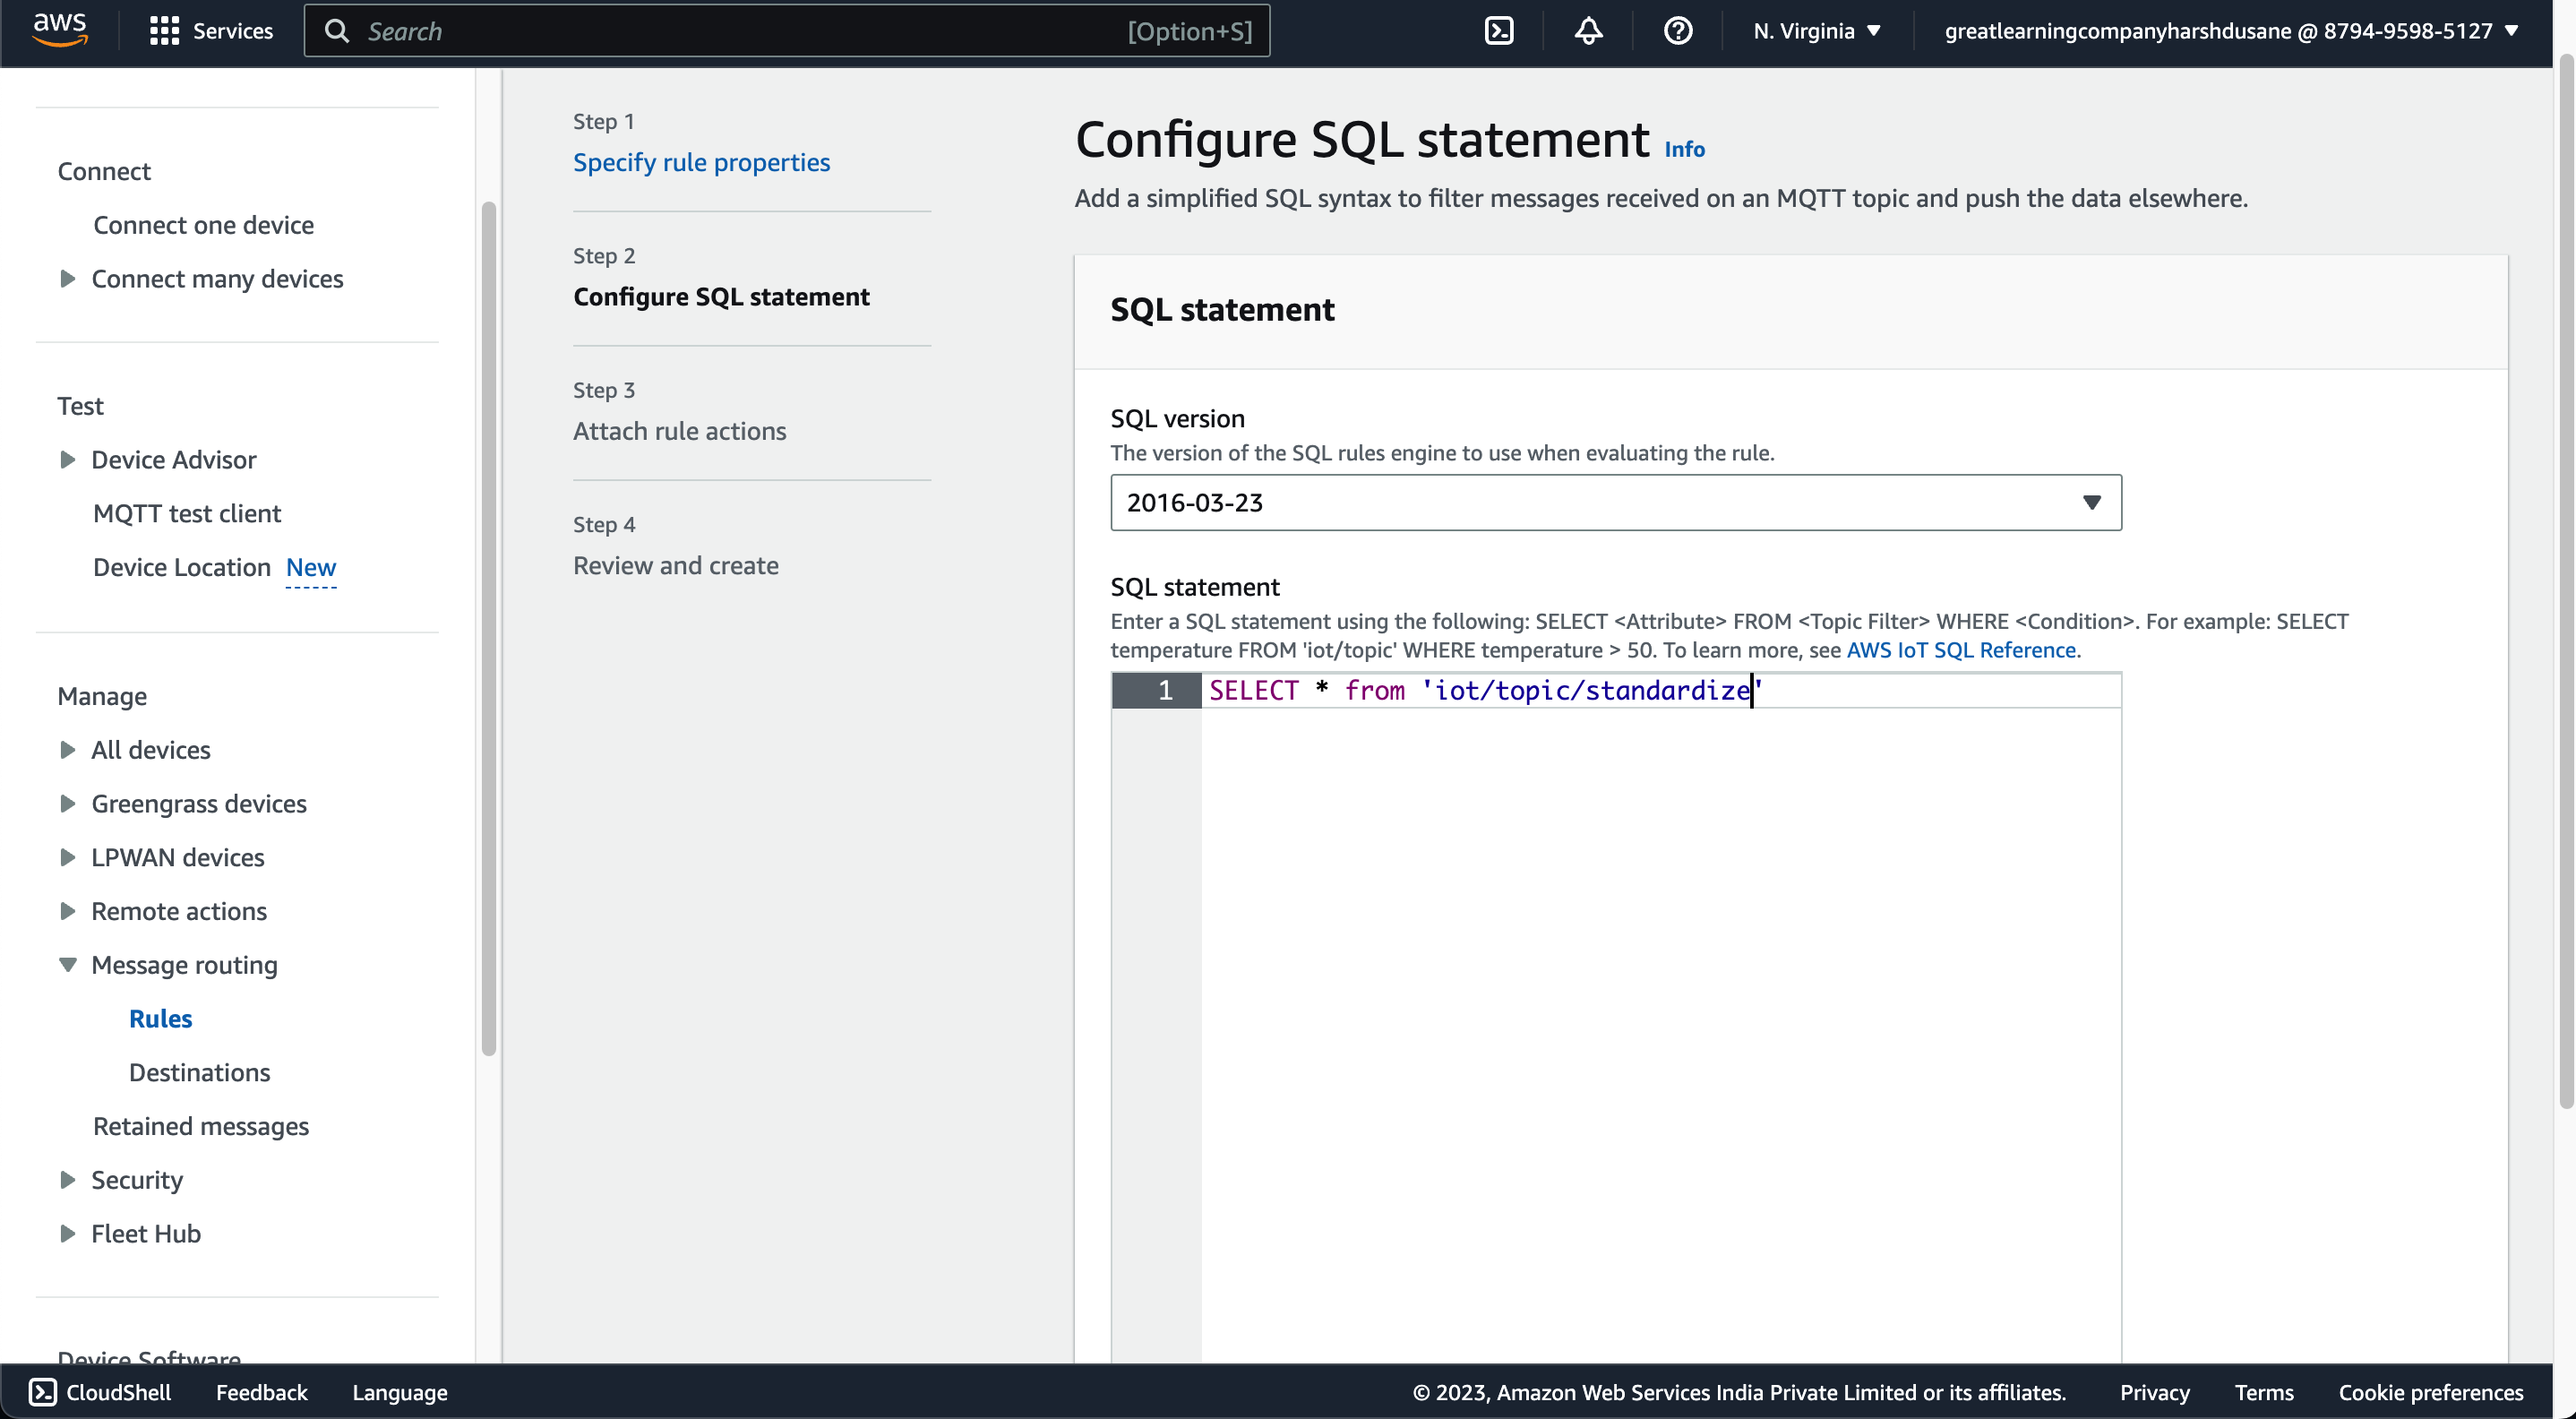

We now add choose ```Add Action``` for this IoT Rule, and choose ```Send A Message To A Lambda Function```:

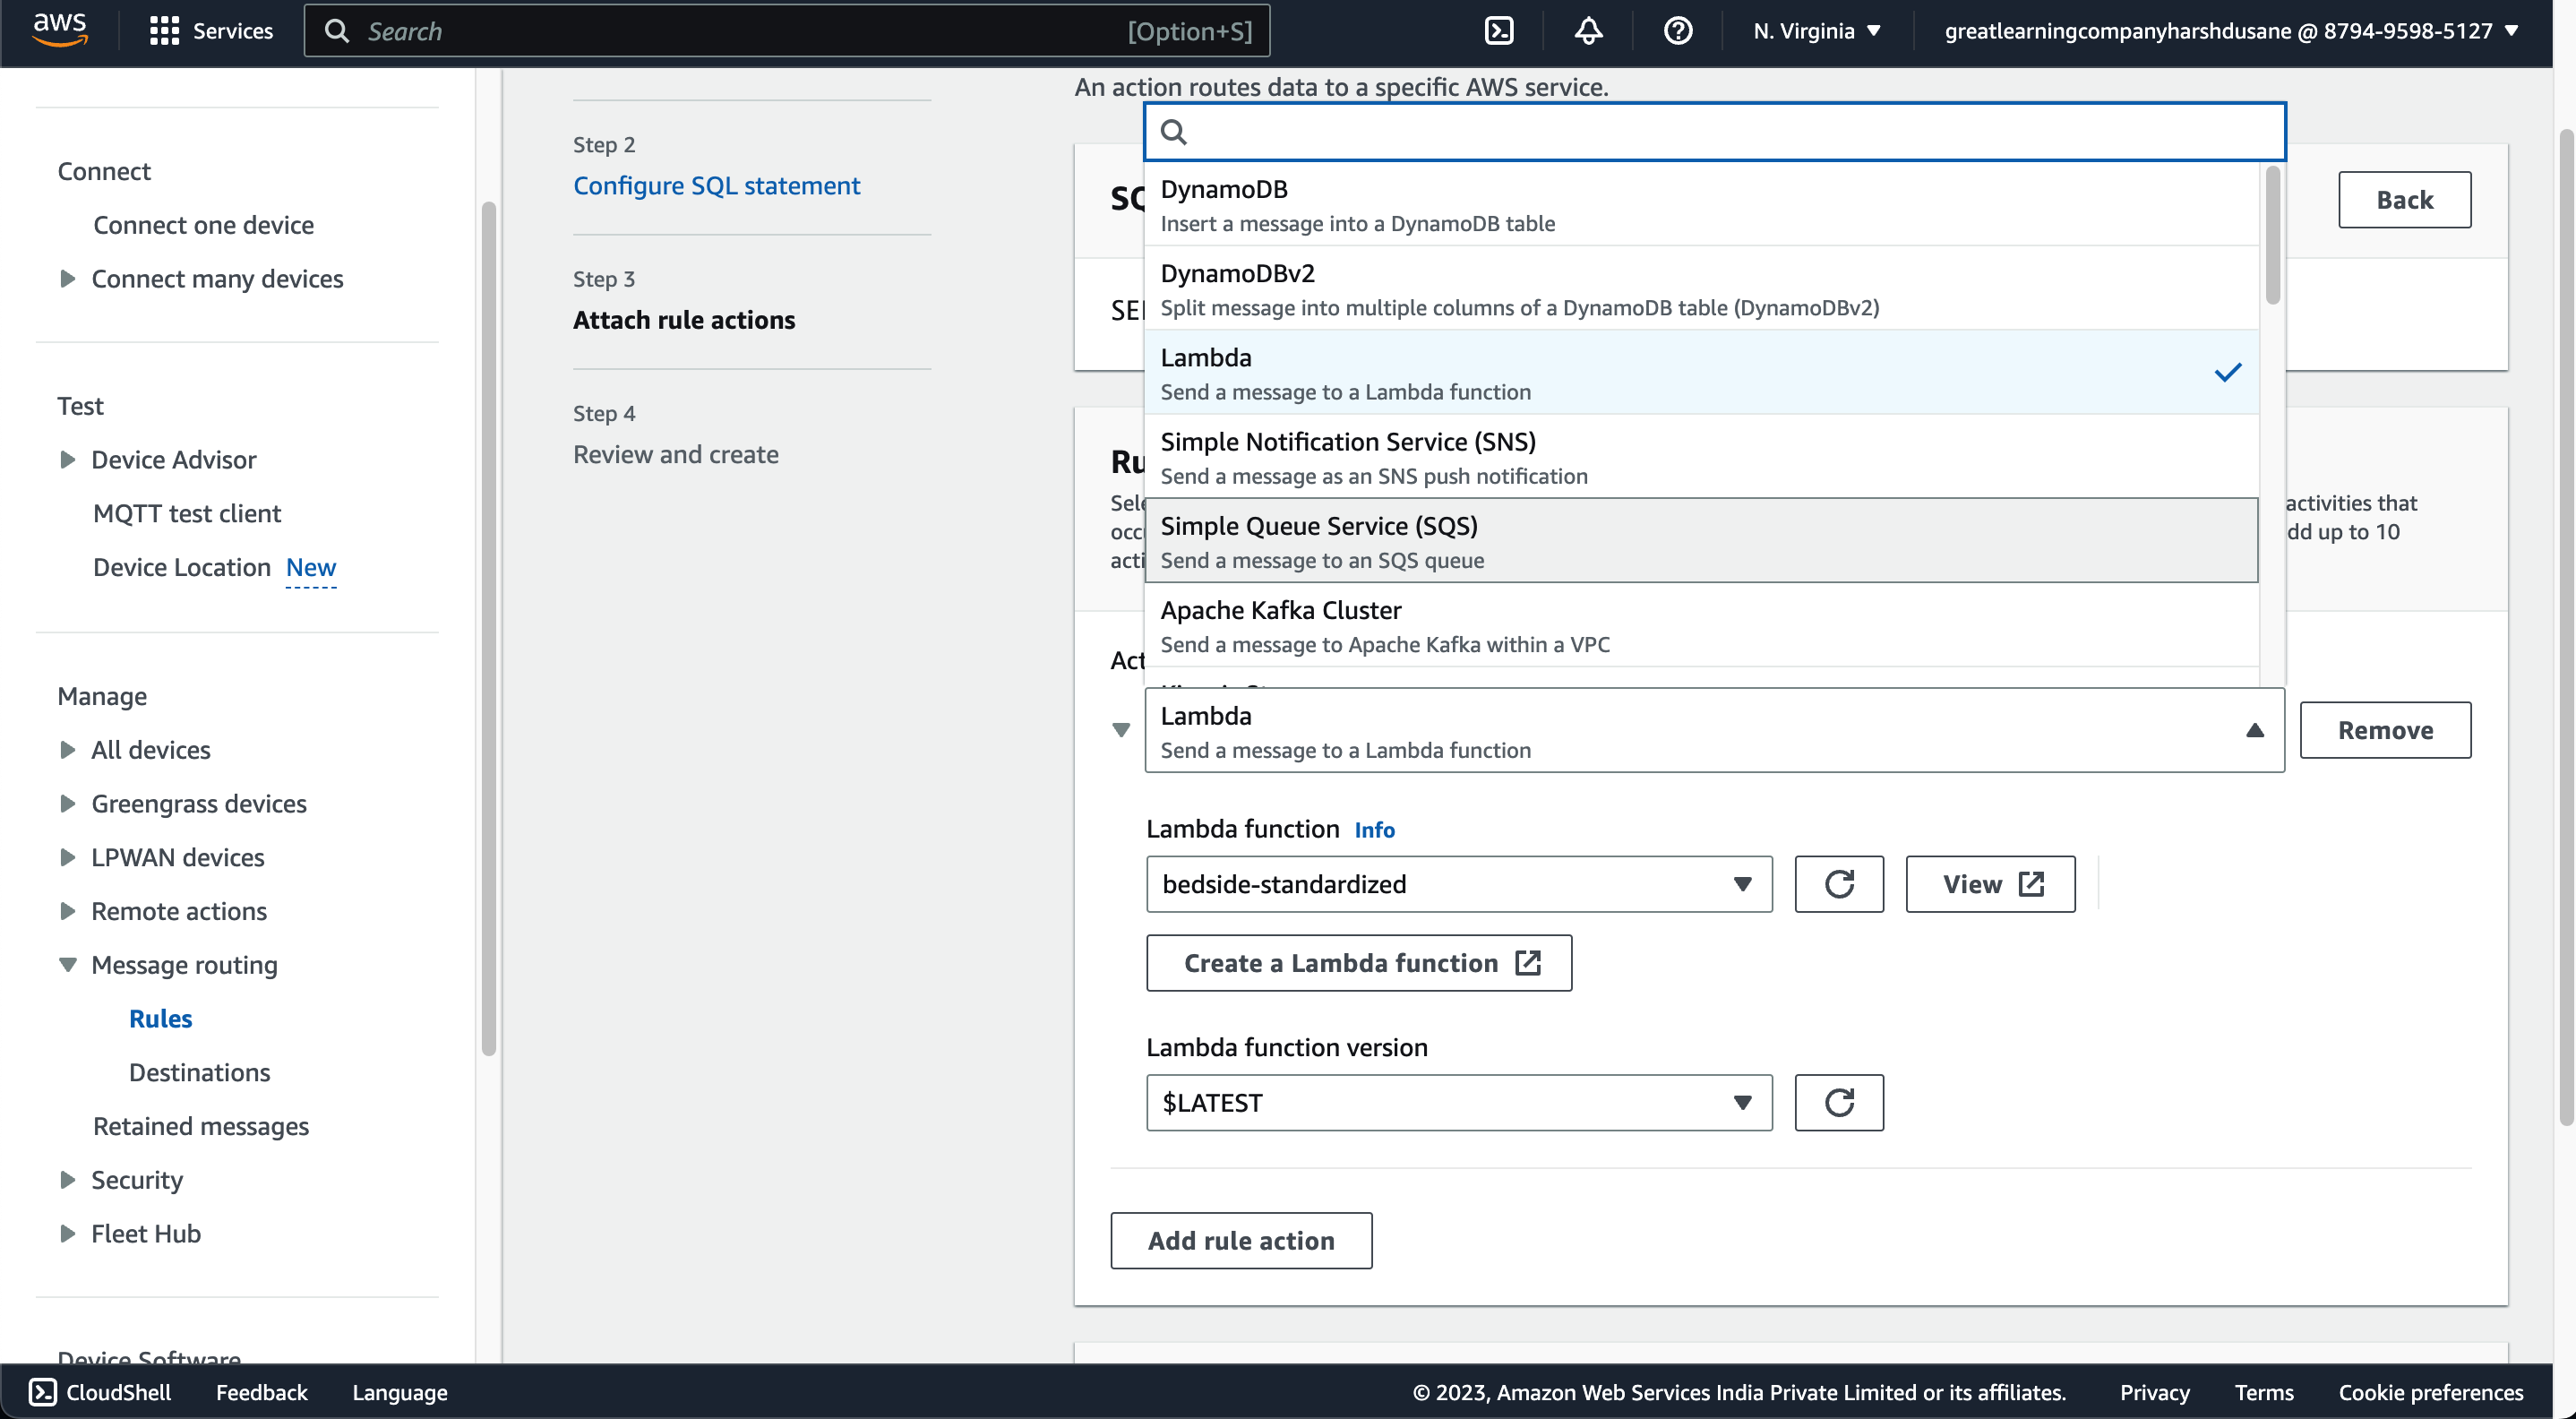

Below that, we select the Lambda function we just created:

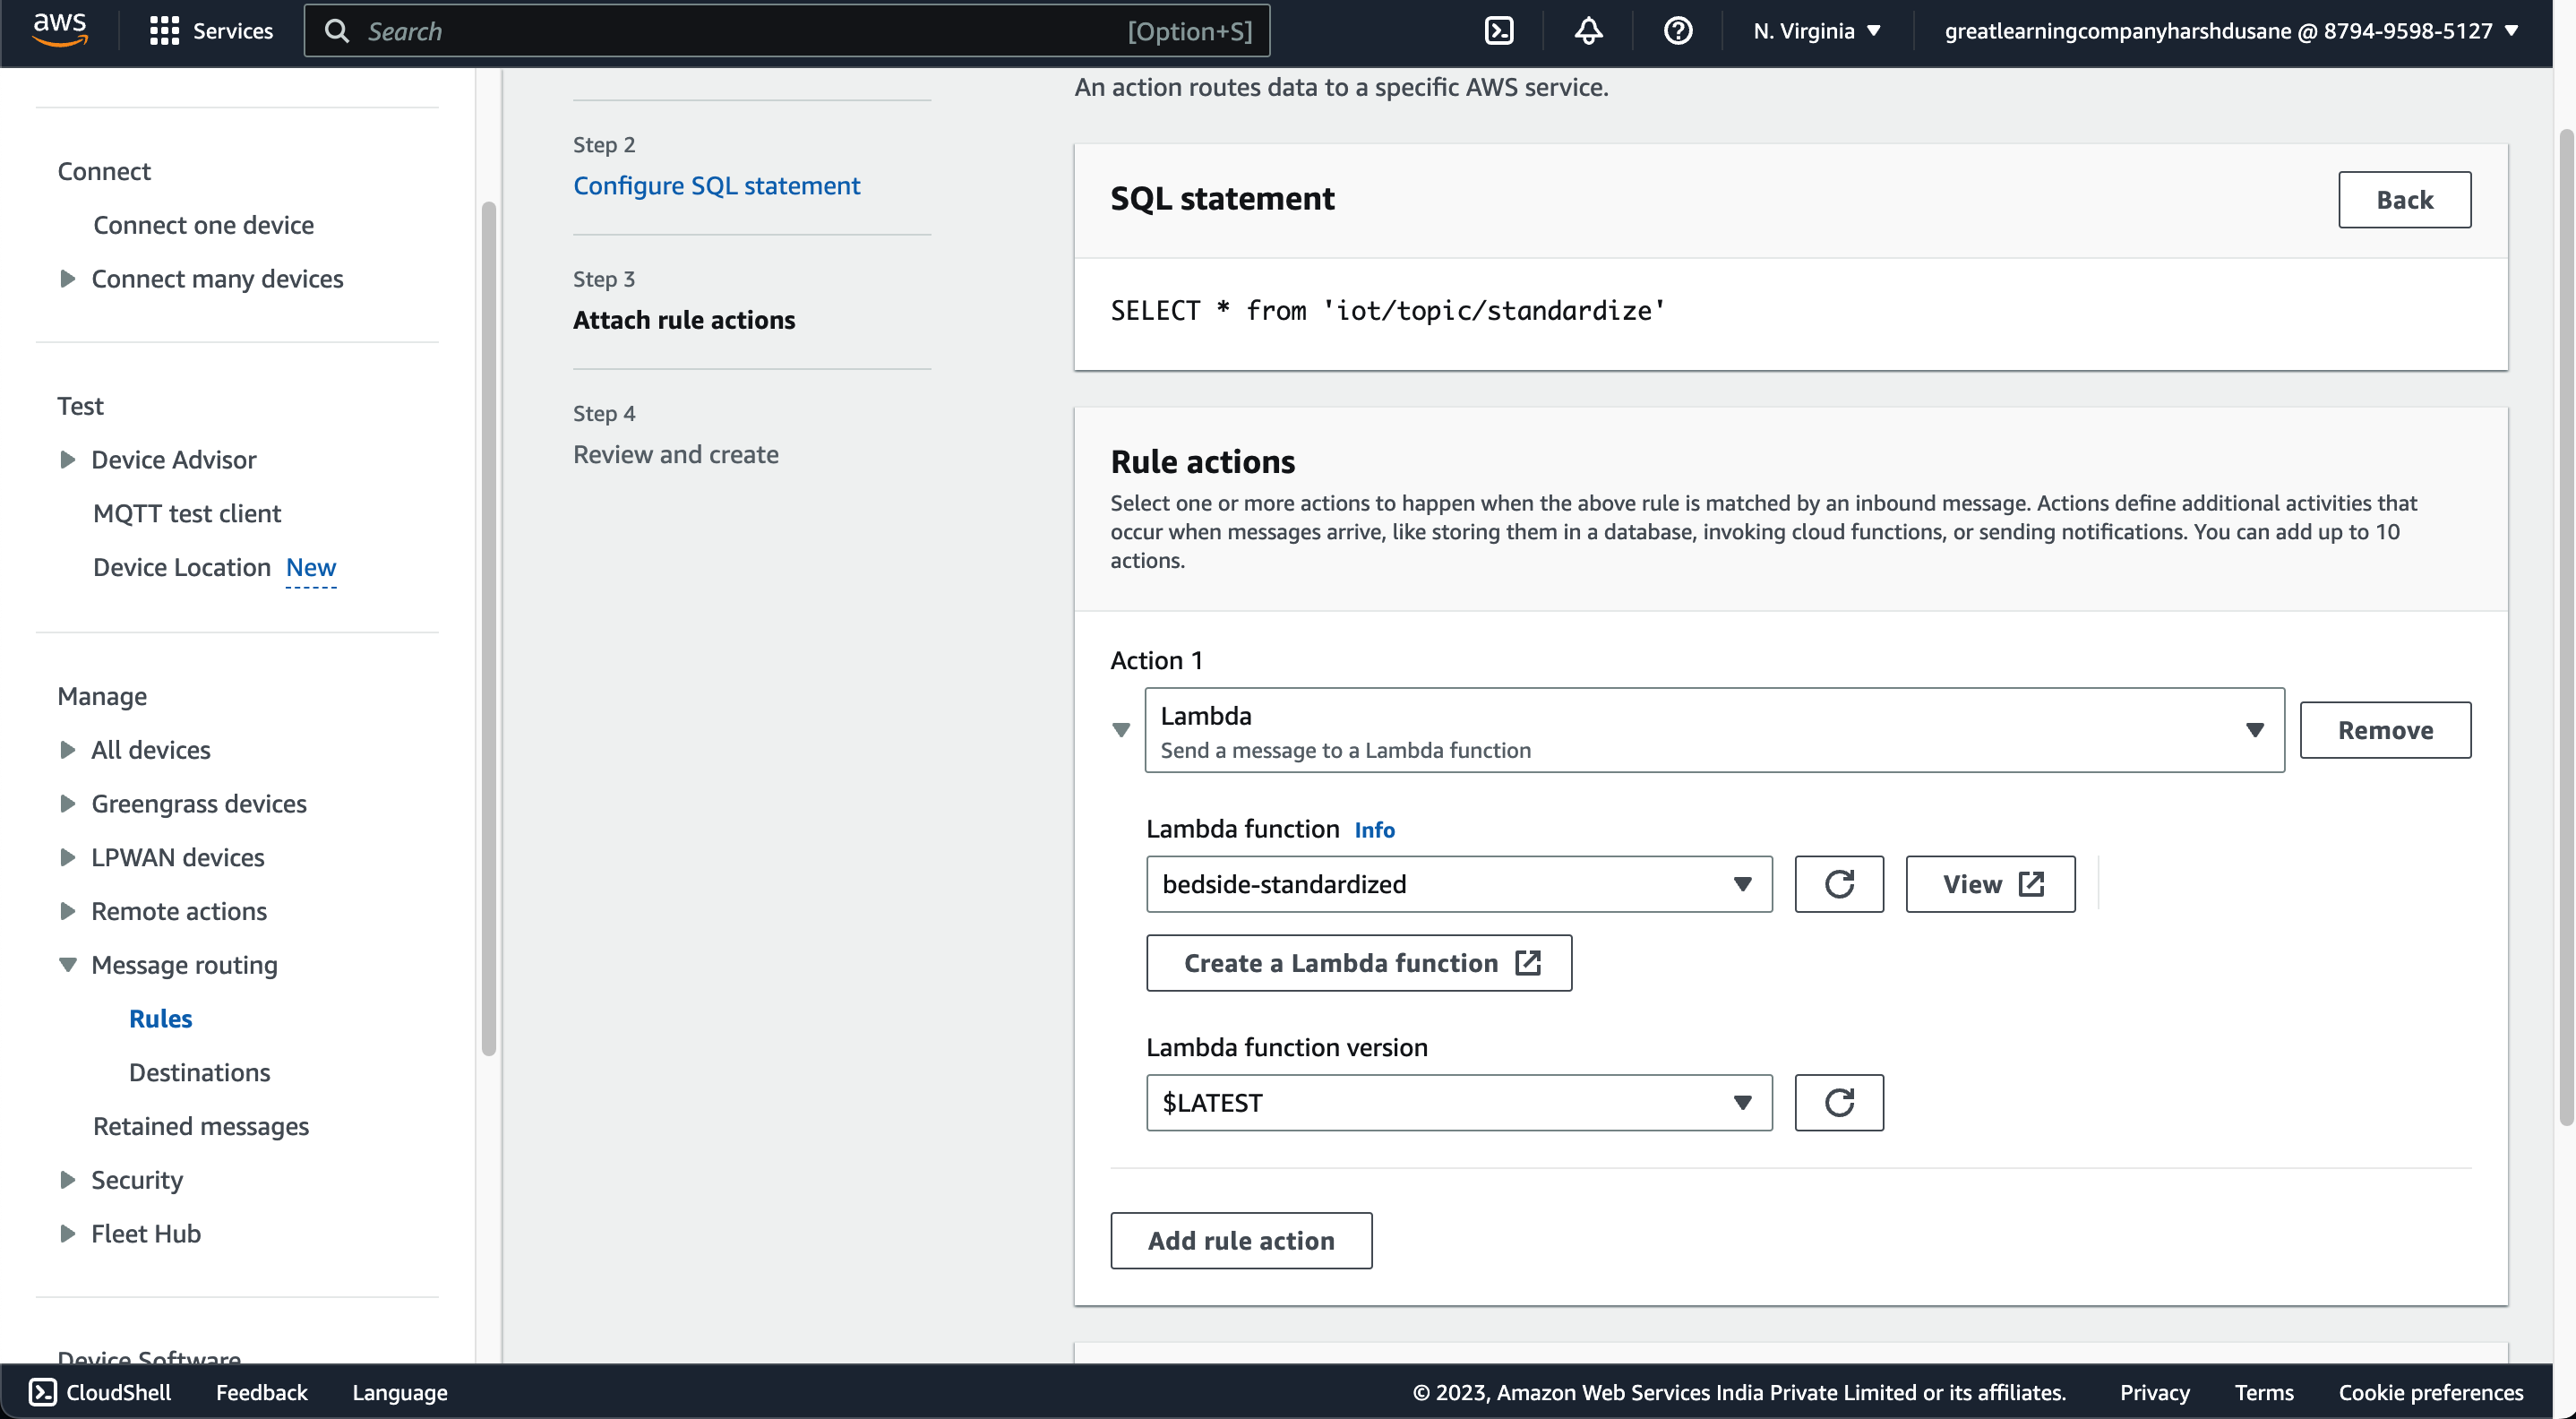

## <font color='blue'> Simulating Device Sensor Data </font>

It is now time to test our setup with data coming into the IoT Core service. To make our job easier, we reuse the Python script ```BedsideMonitor.py```, which generates fairly random sensor data programatically.

```BedsideMonitor.py``` is the same script we had used the previous week to set up storage of Kinesis Stream data into an Amazon S3 bucket, through Kinesis Firehose.

We run this script from our command line, and in order to send these to the IoT Core, we need to make some arrangements.

As in the previous Mentor Notebook, make sure the following certificates and key files have been generated and downloaded:

* Certificates
* Private Key
* Root Certificates

The command we need to run has the following template, and we publish to the topic ```iot/topic/standardize```:

```python BedSideMonitor.py -e <<endpoint>> -r <<root_certificate>> -c <<thing_certificate>> -k <<thing_private_key>> -id <<client-id>> -t iot/topic/standardize```

Run this command, and the data should get processed.

## <font color='blue'> Examining The DynamoDB Table </font>

In the AWS Management Console, Go to ```DynamoDB``` and choose the table we had created for this use case.

Refreshing the table if necessary, we should see successive JSON records getting appended to the table at regular intervals.